# Regresión lineal

## Mínimos cuadrados

In [31]:
import numpy as np
from numpy.linalg import inv 
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

### 1. Tabla de mínimos cuadrados

In [32]:
x = [30, 28, 32, 25, 25, 25, 22, 24, 35, 40]
y = [25, 30, 27, 40, 42, 40, 50, 45, 30, 25]
X = sm.add_constant(x)

In [33]:
xy = []
xx = []
for i in range(len(x)):
  xy.append(x[i]*y[i])
  xx.append(x[i]*x[i])

In [34]:
ls_table = [[x], [y], [xy], [xx]]
ls_table

[[[30, 28, 32, 25, 25, 25, 22, 24, 35, 40]],
 [[25, 30, 27, 40, 42, 40, 50, 45, 30, 25]],
 [[750, 840, 864, 1000, 1050, 1000, 1100, 1080, 1050, 1000]],
 [[900, 784, 1024, 625, 625, 625, 484, 576, 1225, 1600]]]

In [35]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/Users/nasa_penguin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     20.33
Date:                Fri, 18 Feb 2022   Prob (F-statistic):            0.00198
Time:                        15:36:28   Log-Likelihood:                -29.362
No. Observations:                  10   AIC:                             62.72
Df Residuals:                       8   BIC:                             63.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1151      8.736      8.484      0.000      53.970      94.260
x1            -1.3537      0.300     -4.509      0.002      -2.046      -0.661
==============================================================================
Omnibus:                        1.151   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.883
Skew:                          -0.551   Prob(JB):                        0.643
Kurtosis:                       2.048   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Coeficiente de Pearson

In [36]:
pearson = np.corrcoef(x, y)[0][1]
pearson

-0.8471401998291059

### 3. Coeficiente de determinación

In [37]:
coef = results.params[1]
coef

-1.3536754507628275

### 4. Pendiente de la tangente

In [38]:
def slope(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1)
    return x

In [39]:
slope(x[0], y[0], x[2], y[2])

1.0

### 5. Ordenada al origen

In [40]:
intercept = results.params[0]
intercept

74.11511789181687

### 6. Establece la recta de regresión

In [41]:
ec = f"y = {coef} x + {intercept}"
ec

'y = -1.3536754507628275 x + 74.11511789181687'

### 7. Dibuja la gráfica de dispersión

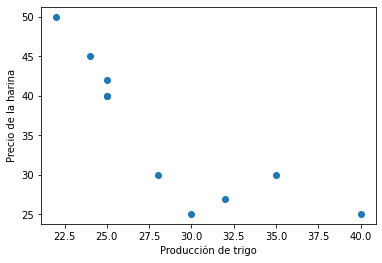

In [42]:
plt.scatter(x, y); plt.xlabel('Producción de trigo'); plt.ylabel('Precio de la harina');

### 8. Línea de tendencia

In [43]:
y_pred = results.predict(X)

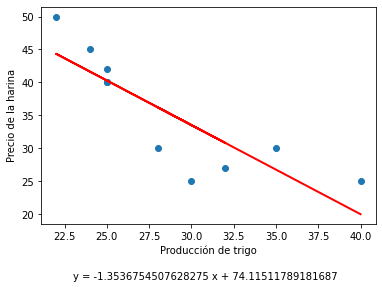

In [44]:
plt.scatter(x, y); plt.xlabel('Producción de trigo'); plt.ylabel('Precio de la harina');
plt.plot(x, y_pred, c='red', linewidth=2)
plt.text(23,10,ec)
plt.show()

### 9. Conclusión

Entre menor es la producción de trigo mayor el precio de la harina, por lo tanto se espera que cuando suba el precio es porque sube la producción, el modelo tiene eficacia del 70% (r cuadrada).